# Feature Analysis on Scenario A dataset
This notebook serves to work through the feature presented in the Scenario A datasets and attempt to explain the performance of the models we see in other notebooks. Since there are 5 data files for each scenario, here we will the distributions and plots of features across the data files to show any trends with the timeout values.   

## To - Do:
 - [ ] Compare the feature graphs across timeout values
 - [ ] Determine the features that have the clearest distinction between classes
 - [ ] Run Feature Selection algorithms from `sklearn` to determine the most significant features

In [1]:
# Import Seaborn for the graphing
import seaborn as sns
import matplotlib.pyplot as plt

# Data management
import pandas as pd

print('Imports complete.')

Imports complete.


In [2]:
path = '../../tor_dataset/'
scenario = 'Scenario-A/'
files=['TimeBasedFeatures-15s-TOR-NonTOR.csv', 
       'TimeBasedFeatures-30s-TOR-NonTOR.csv', 
       'TimeBasedFeatures-60s-TOR-NonTOR.csv', 
       'TimeBasedFeatures-120s-TOR-NonTOR.csv']

df15, df30, df60, df120 = [pd.read_csv(path + scenario + file) for file in files]

In [3]:
print('df15: \nnum features: {}\n{}'.format(len(df15.columns)-1, df15['class'].value_counts()))
print('\ndf30: \nnum features: {}\n{}'.format(len(df30.columns)-1, df30['class'].value_counts()))
print('\ndf60: \nnum features: {}\n{}'.format(len(df60.columns)-1, df60['class'].value_counts()))
print('\ndf120: \nnum features: {}\n{}'.format(len(df120.columns)-1, df120['class'].value_counts()))

df15: 
num features: 23
NONTOR    18758
TOR        3314
Name: class, dtype: int64

df30: 
num features: 23
NONTOR    14651
TOR        1771
Name: class, dtype: int64

df60: 
num features: 23
NONTOR    15515
TOR         914
Name: class, dtype: int64

df120: 
num features: 23
NONTOR    10782
TOR         470
Name: class, dtype: int64


In [4]:
dictionary = {}

for df in [df15, df30, df60, df120]:
    for feature in df.columns[:-1]:
        if feature in dictionary:
            dictionary[feature] += 1
        else:
            dictionary[feature] = 1

print('Feature\t\tCount')
for feature in dictionary:
    print('{}\t{}'.format(feature, dictionary[feature]))

Feature		Count
duration	4
total_fiat	3
total_biat	3
min_fiat	4
min_biat	4
max_fiat	4
max_biat	4
mean_fiat	4
mean_biat	4
flowPktsPerSecond	4
flowBytesPerSecond	4
min_flowiat	4
max_flowiat	4
mean_flowiat	4
std_flowiat	4
min_active	4
mean_active	4
max_active	4
std_active	4
min_idle	4
mean_idle	4
max_idle	4
std_idle	4
std_fiat	1
std_biat	1


As we can see from above, there are some features that don't show up in all of the datasets. In our case here, we are seeing that the `total_fiat`, `total_biat`, `std_fiat`, and `std_biat` features are the ones not appearing everywhere. Due to this discrepancy, I am going to do nothing and move on with my life.   

Let's provide an example of graphing the features here.

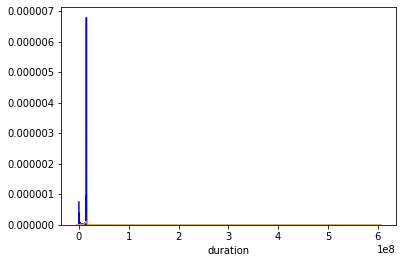

In [5]:
dep_var = 'class'

plt.figure()

df15tor = df15.loc[ df15[dep_var] == 'TOR' ] 
df15nontor = df15.loc[ df15[dep_var] == 'NONTOR' ]

sns.distplot(df15tor['duration'], color='blue')
sns.distplot(df15nontor['duration'], color='orange')

plt.show()

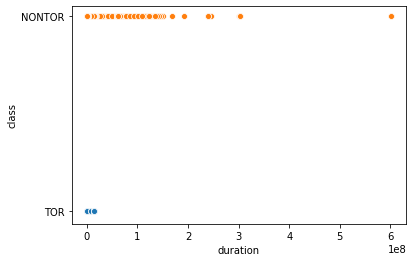

In [6]:
dep_var = 'class'

plt.figure()

df15tor = df15.loc[ df15[dep_var] == 'TOR' ] 
df15nontor = df15.loc[ df15[dep_var] == 'NONTOR' ]

sns.scatterplot(df15tor['duration'], df15tor[dep_var])
sns.scatterplot(df15nontor['duration'], df15nontor[dep_var])

plt.show()

In [7]:
def show_scatter(df, feature=''):
    dep_var = 'class'

    plt.figure()

    dftor = df.loc[ df[dep_var] == 'TOR' ] 
    dfnontor = df.loc[ df[dep_var] == 'NONTOR' ]

    try:
        sns.scatterplot(dftor[feature], dftor[dep_var])
        sns.scatterplot(dfnontor[feature], dfnontor[dep_var])

        plt.show()
    except:
        print('Feature not present')
    
def show_dist(df, feature=''):
    dep_var = 'class'

    plt.figure()

    dftor = df.loc[ df[dep_var] == 'TOR' ] 
    dfnontor = df.loc[ df[dep_var] == 'NONTOR' ]

    try:
        sns.distplot(dftor[feature], color='blue')
        sns.distplot(dfnontor[feature], color='orange')

        plt.legend(['Tor', 'NonTor'])
    
        plt.show()
    except:
        print('Feature not present')

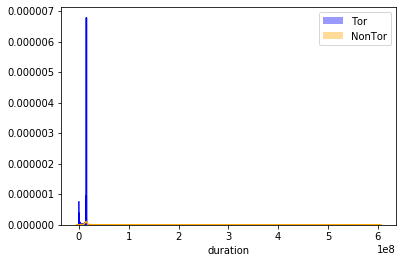

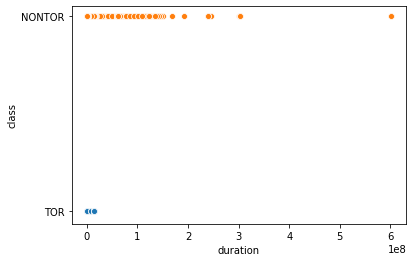

In [8]:
show_dist(df15, 'duration')
show_scatter(df15, 'duration')

Great! Now that we've streamlined the process, we can move on to output all of the scatter and distribution plots with the goal of finding the best features.

In [9]:
features = dictionary.keys()

------------------------------------------------
df15


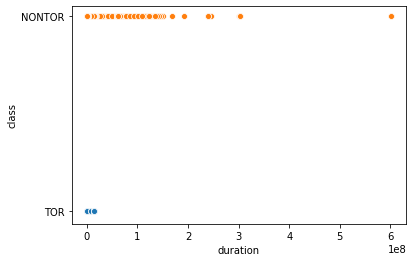

df30


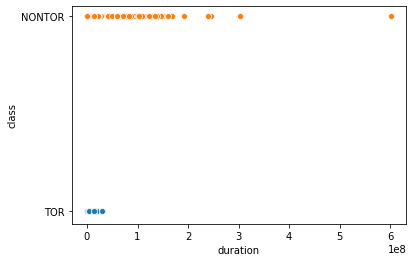

df60


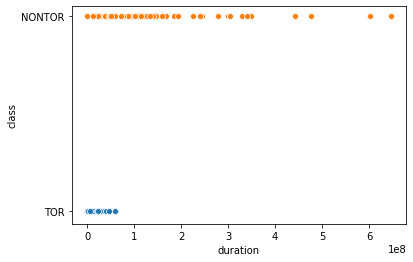

df120


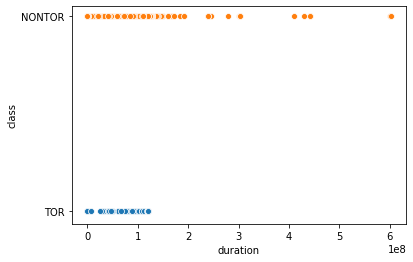

------------------------------------------------
df15


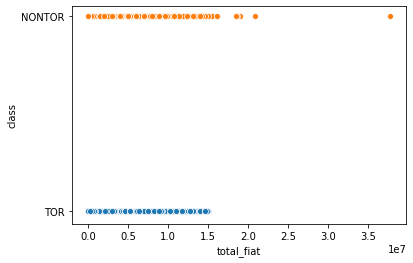

df30


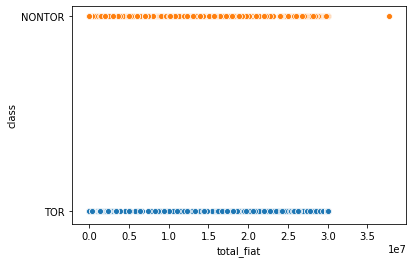

df60
Feature not present
df120


<Figure size 432x288 with 0 Axes>

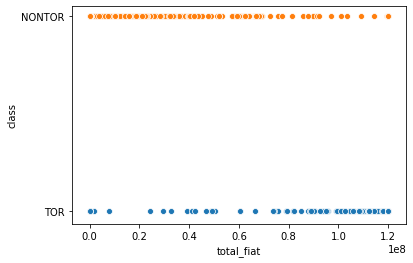

------------------------------------------------
df15


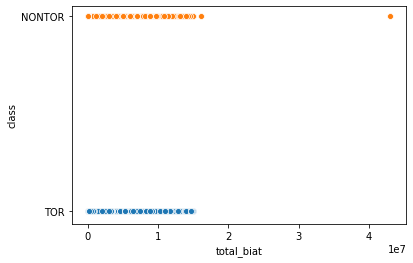

df30


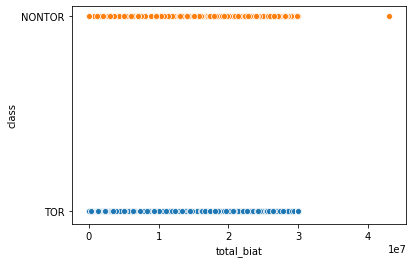

df60
Feature not present
df120


<Figure size 432x288 with 0 Axes>

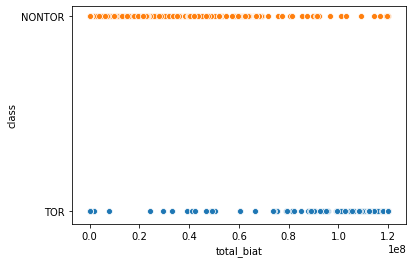

------------------------------------------------
df15


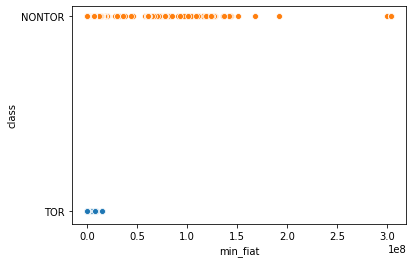

df30


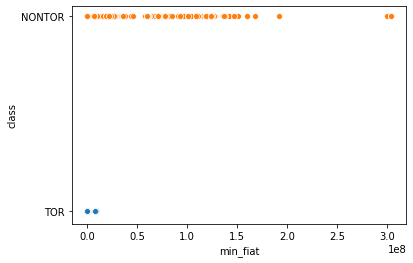

df60


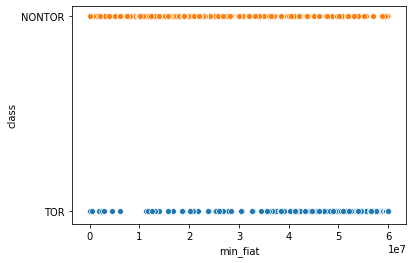

df120


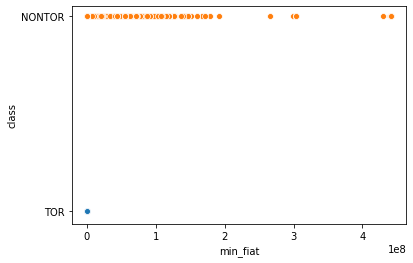

------------------------------------------------
df15


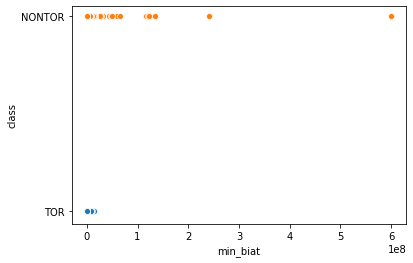

df30


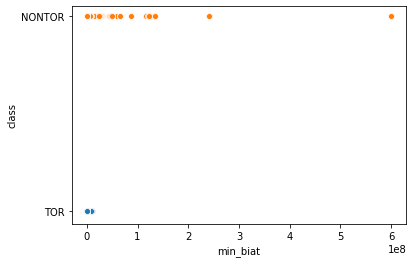

df60


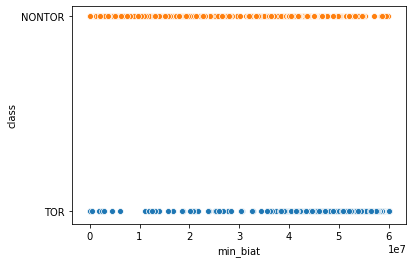

df120


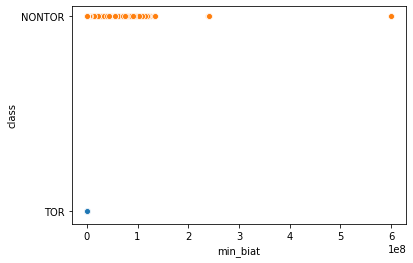

------------------------------------------------
df15


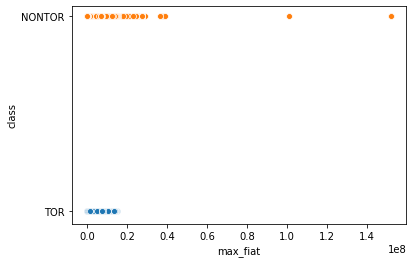

df30


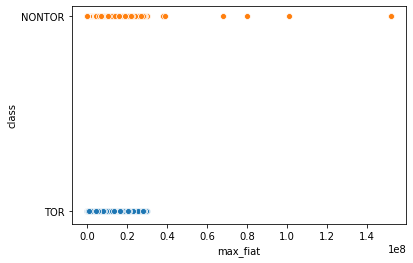

df60


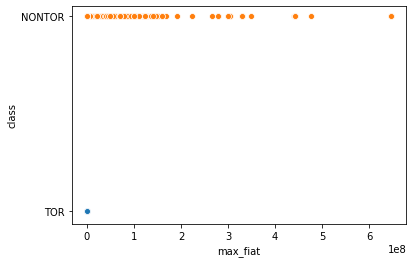

df120


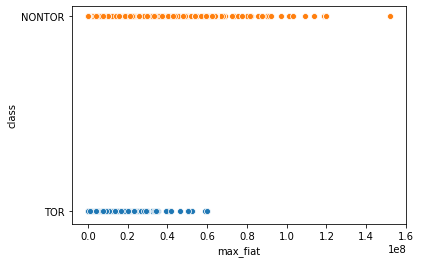

------------------------------------------------
df15


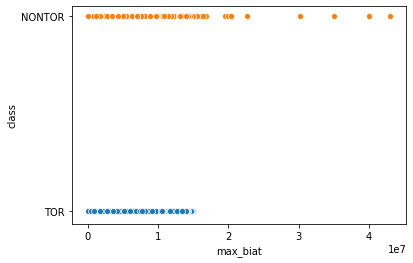

df30


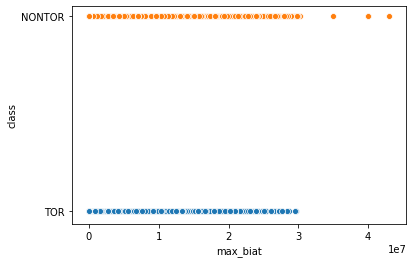

df60


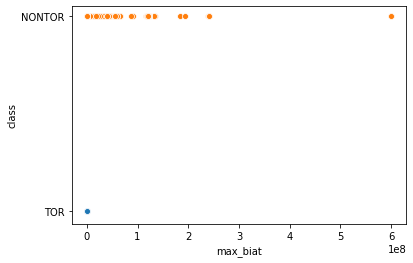

df120


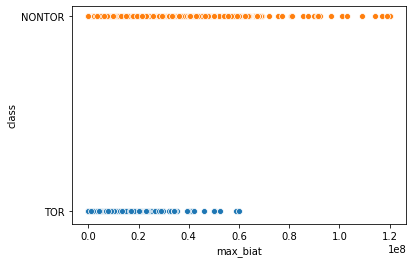

------------------------------------------------
df15


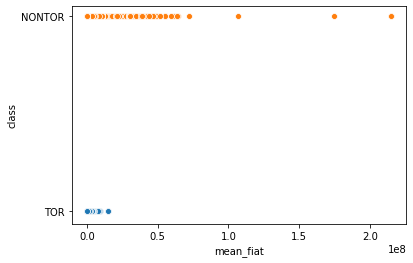

df30


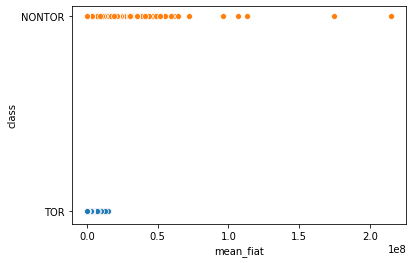

df60


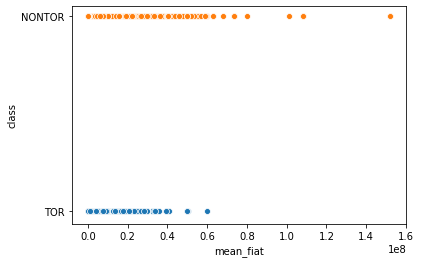

df120


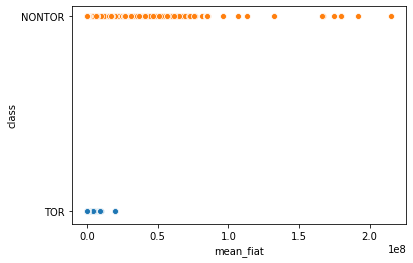

------------------------------------------------
df15


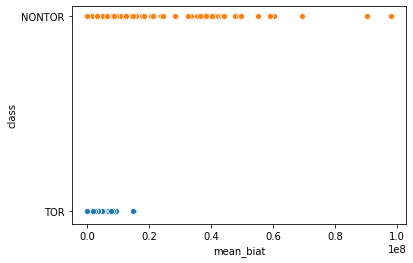

df30


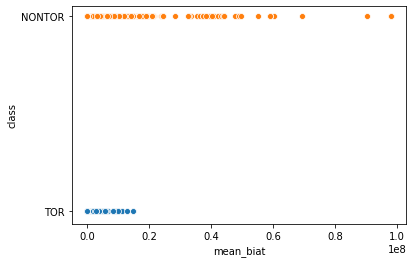

df60


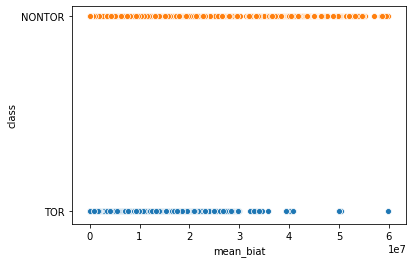

df120


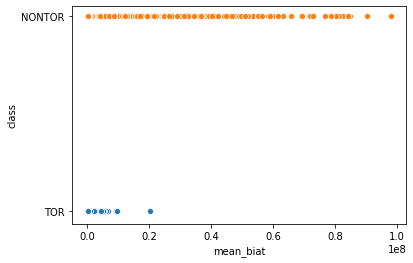

------------------------------------------------
df15


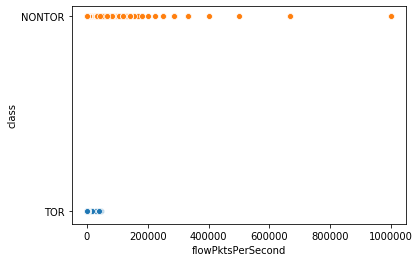

df30


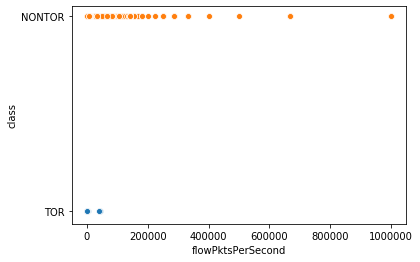

df60


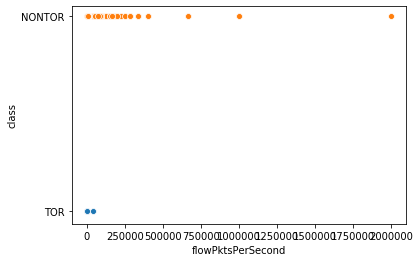

df120


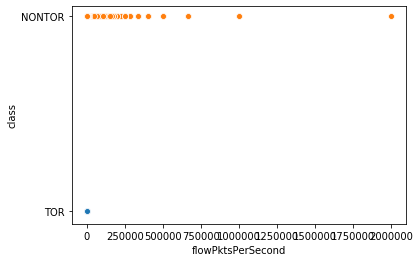

------------------------------------------------
df15


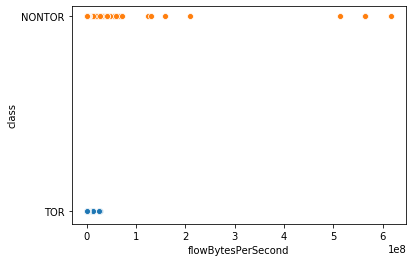

df30


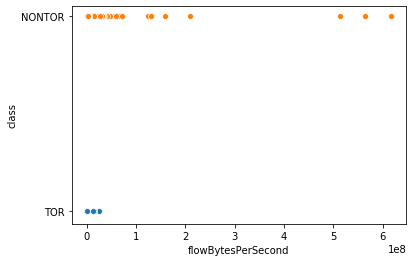

df60


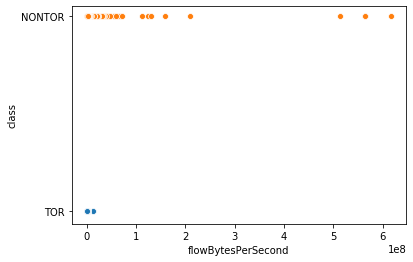

df120


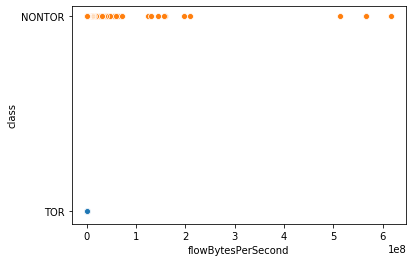

------------------------------------------------
df15


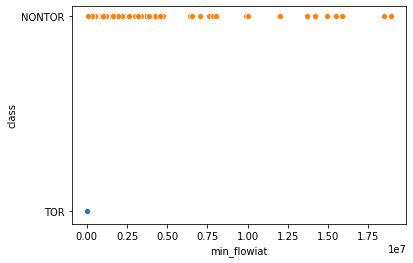

df30


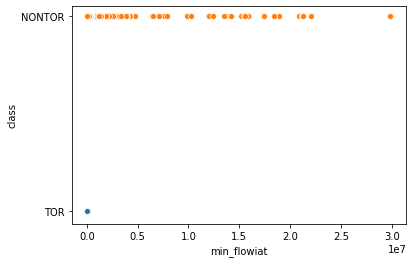

df60


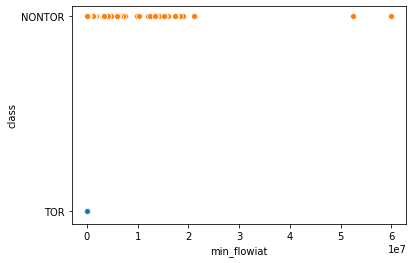

df120


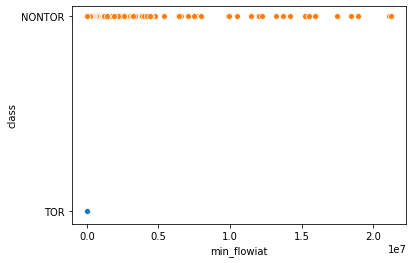

------------------------------------------------
df15


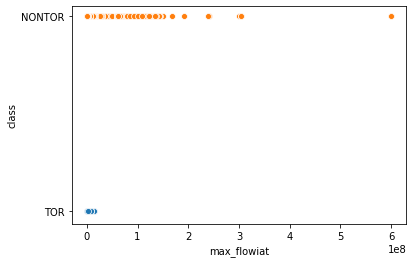

df30


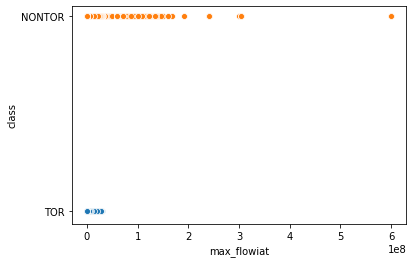

df60


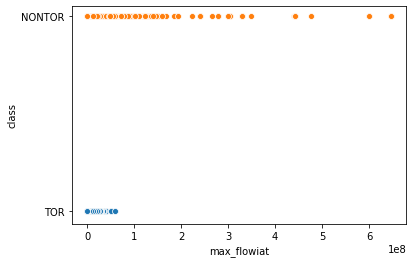

df120


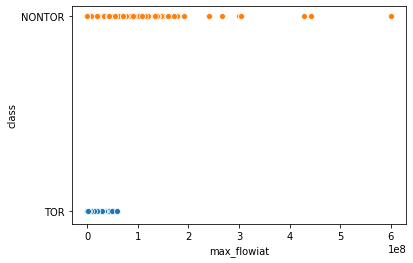

------------------------------------------------
df15


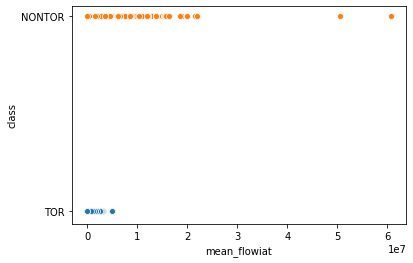

df30


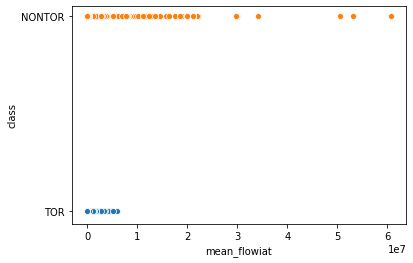

df60


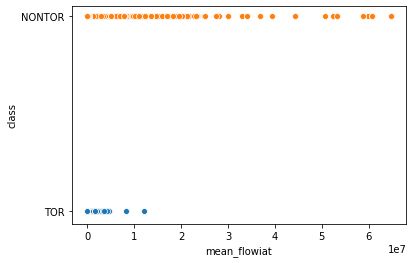

df120


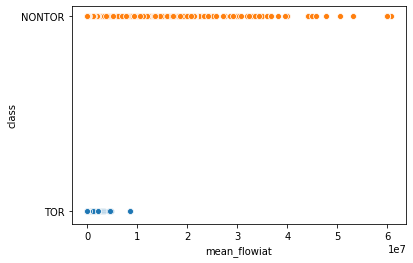

------------------------------------------------
df15


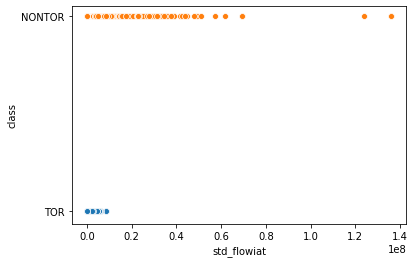

df30


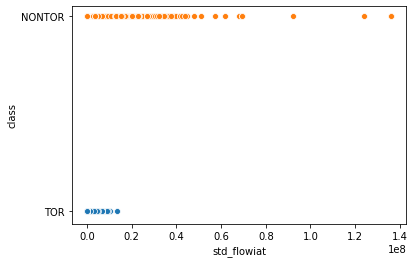

df60


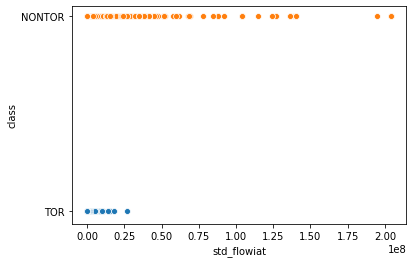

df120


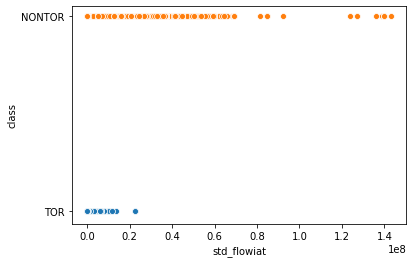

------------------------------------------------
df15


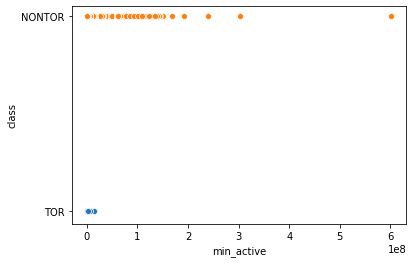

df30


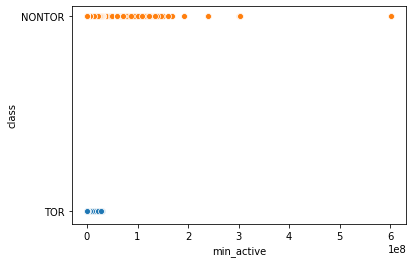

df60


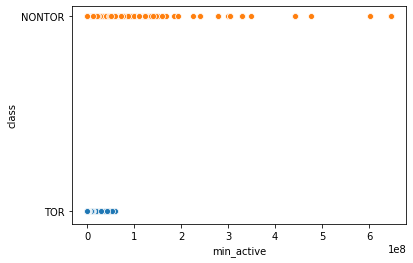

df120


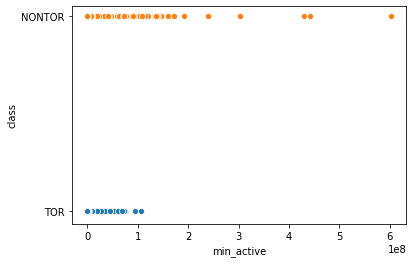

------------------------------------------------
df15


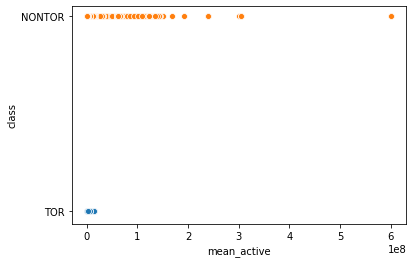

df30


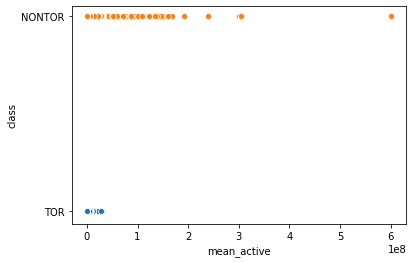

df60


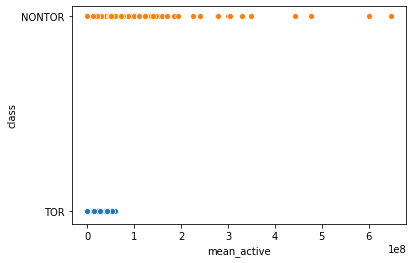

df120


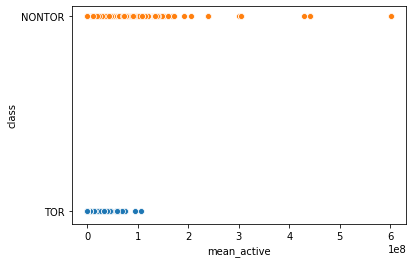

------------------------------------------------
df15


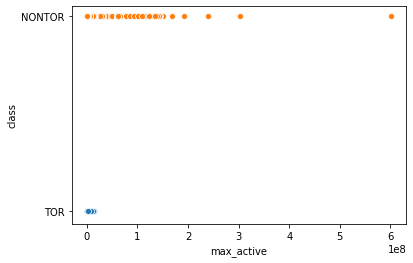

df30


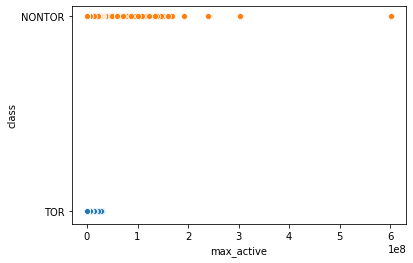

df60


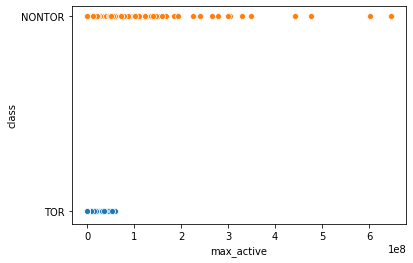

df120


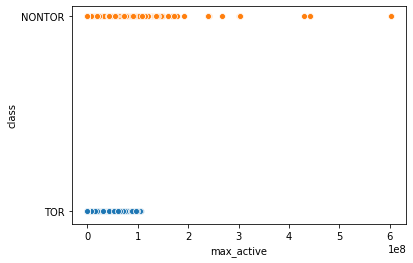

------------------------------------------------
df15


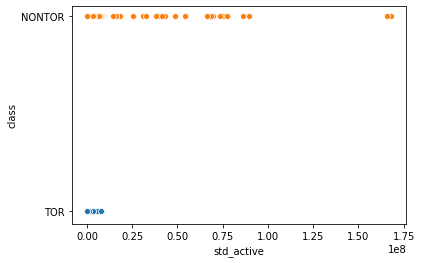

df30


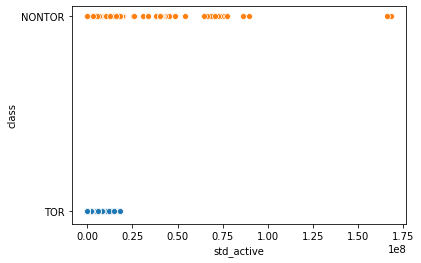

df60


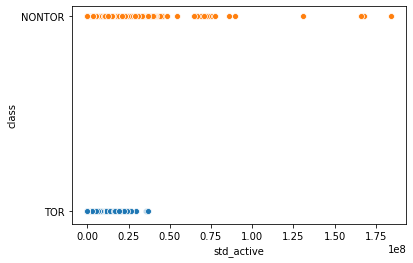

df120


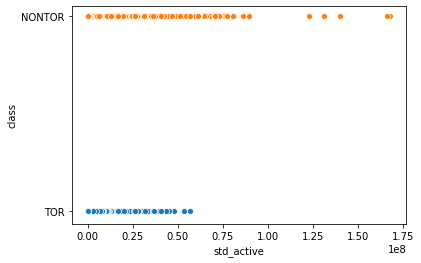

------------------------------------------------
df15


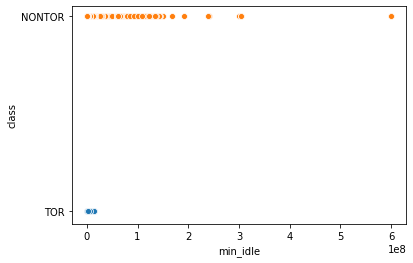

df30


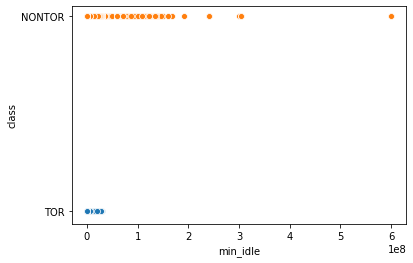

df60


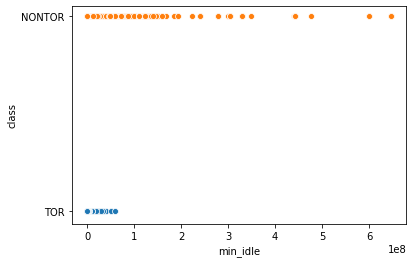

df120


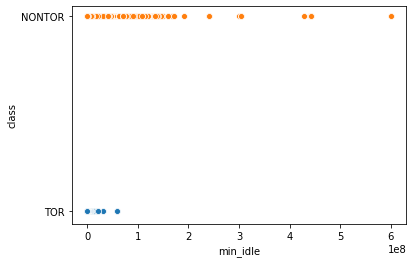

------------------------------------------------
df15


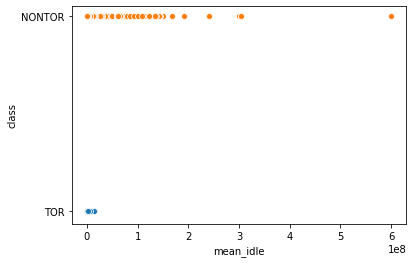

df30


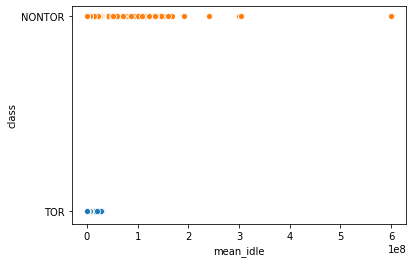

df60


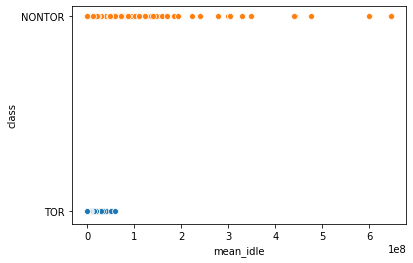

df120


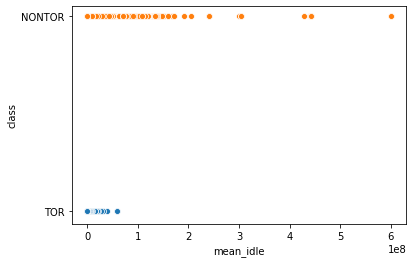

------------------------------------------------
df15


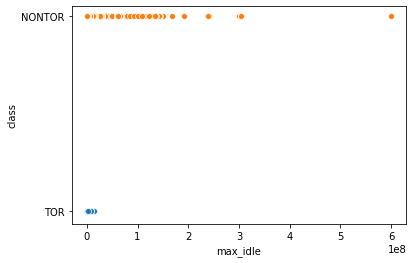

df30


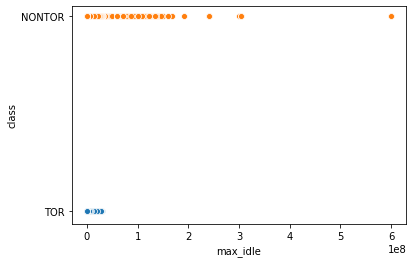

df60


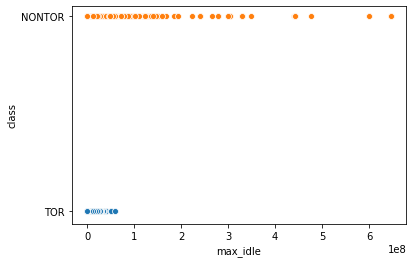

df120


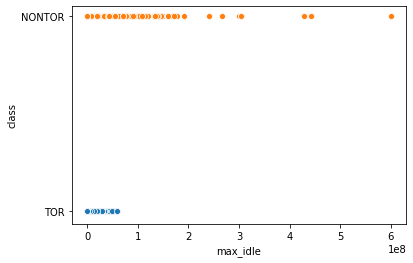

------------------------------------------------
df15


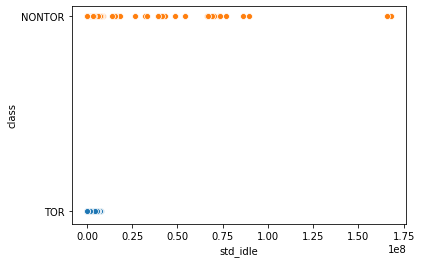

df30


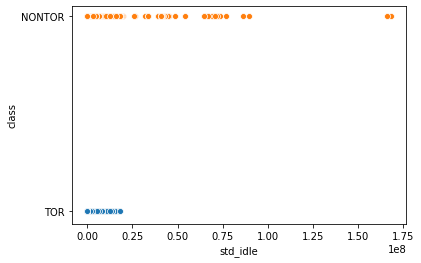

df60


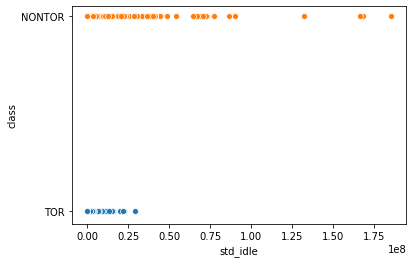

df120


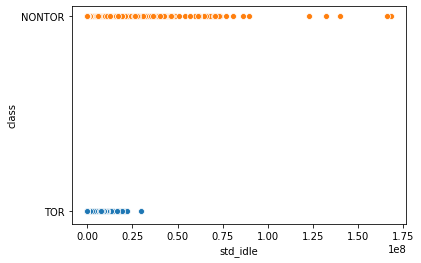

------------------------------------------------
df15
Feature not present
df30
Feature not present
df60


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

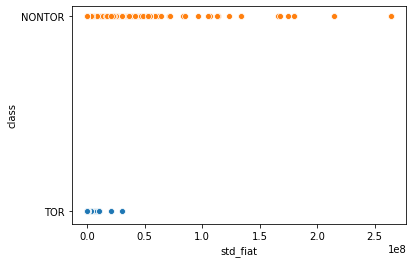

df120
Feature not present
------------------------------------------------
df15
Feature not present
df30
Feature not present
df60


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

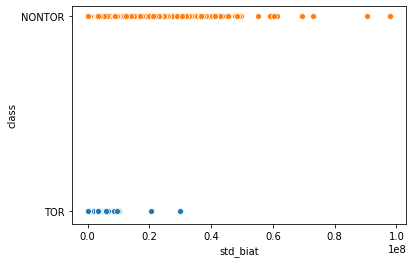

df120
Feature not present


<Figure size 432x288 with 0 Axes>

In [10]:
for feature in features:
    print('------------------------------------------------')
    print('df15')
    show_scatter(df15, feature)
    print('df30')
    show_scatter(df30, feature)
    print('df60')
    show_scatter(df60, feature)
    print('df120')
    show_scatter(df120, feature)

This is unreadable! Let's do some fancy `pyplot` business to clean this output up!

<Figure size 432x288 with 0 Axes>

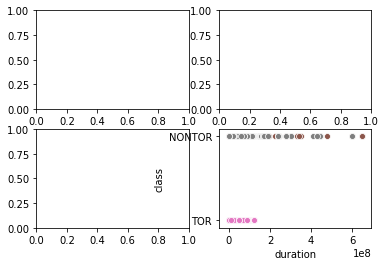

In [11]:
plt.figure()

fig, axs = plt.subplots(nrows=2, ncols=2)

df = df15
dftor = df.loc[ df[dep_var] == 'TOR' ] 
dfnontor = df.loc[ df[dep_var] == 'NONTOR' ]
sns.scatterplot(dftor['duration'], dftor[dep_var])
sns.scatterplot(dfnontor['duration'], dfnontor[dep_var])

df = df30
dftor = df.loc[ df[dep_var] == 'TOR' ] 
dfnontor = df.loc[ df[dep_var] == 'NONTOR' ]
sns.scatterplot(dftor['duration'], dftor[dep_var])
sns.scatterplot(dfnontor['duration'], dfnontor[dep_var])

df = df60
dftor = df.loc[ df[dep_var] == 'TOR' ] 
dfnontor = df.loc[ df[dep_var] == 'NONTOR' ]
sns.scatterplot(dftor['duration'], dftor[dep_var])
sns.scatterplot(dfnontor['duration'], dfnontor[dep_var])

df = df120
dftor = df.loc[ df[dep_var] == 'TOR' ] 
dfnontor = df.loc[ df[dep_var] == 'NONTOR' ]
sns.scatterplot(dftor['duration'], dftor[dep_var])
sns.scatterplot(dfnontor['duration'], dfnontor[dep_var])

plt.show()

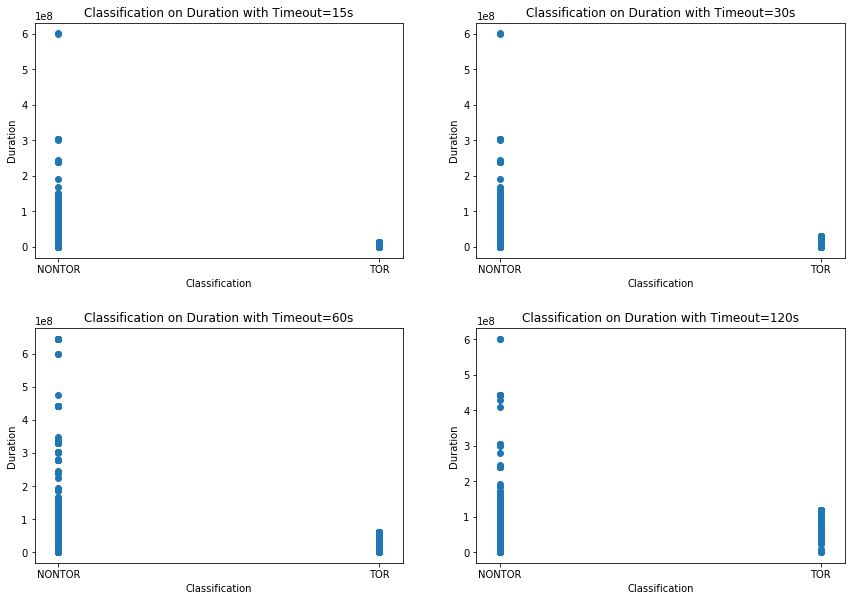

In [12]:
fig,axes= plt.subplots(nrows=2, ncols=2)

df=df15
axes[0][0].scatter(y=df['duration'], x=df[dep_var])
axes[0][0].set_title('Classification on Duration with Timeout=15s')
axes[0][0].set_xlabel('Classification')
axes[0][0].set_ylabel('Duration')

df=df30
axes[0][1].scatter(y=df['duration'], x=df[dep_var])
axes[0][1].set_title('Classification on Duration with Timeout=30s')
axes[0][1].set_xlabel('Classification')
axes[0][1].set_ylabel('Duration')

df=df60
axes[1][0].scatter(y=df['duration'], x=df[dep_var])
axes[1][0].set_title('Classification on Duration with Timeout=60s')
axes[1][0].set_xlabel('Classification')
axes[1][0].set_ylabel('Duration')

df=df120
axes[1][1].scatter(y=df['duration'], x=df[dep_var])
axes[1][1].set_title('Classification on Duration with Timeout=120s')
axes[1][1].set_xlabel('Classification')
axes[1][1].set_ylabel('Duration')

plt.subplots_adjust(right=2.0, top=2.0, wspace=0.2, hspace=0.3)

plt.show()

In [13]:
import numpy as np

def show_scatter_compare(dfs=[], feature='', timeouts=[]):
    nrows = int(np.floor(len(dfs)/2))
    ncols = int(np.ceil(len(dfs)/2))
    fig,axes= plt.subplots(nrows=nrows, ncols=ncols)
    
    # Keep track of which session timeout we are on
    i=0
    
    # Keep track of the axis
    row=0
    col=0

    for df in dfs:
        try:
            axes[col][row].scatter(y=df[feature], x=df[dep_var])
            axes[col][row].set_title('Classification on Duration with Timeout={}s'.format(timeouts[i]))
            axes[col][row].set_xlabel('Classification')
            axes[col][row].set_ylabel(feature)
        except:
            print('No feature for {}s'.format(timeouts[i]))
        
        # Move on to the next axis
        row += 1        
        if row+1 > nrows:
            row=0
            col+=1
            
        # Move on to the next timeout label
        i+=1

    plt.subplots_adjust(right=2.0, top=2.0, wspace=0.2, hspace=0.3)

    plt.show()

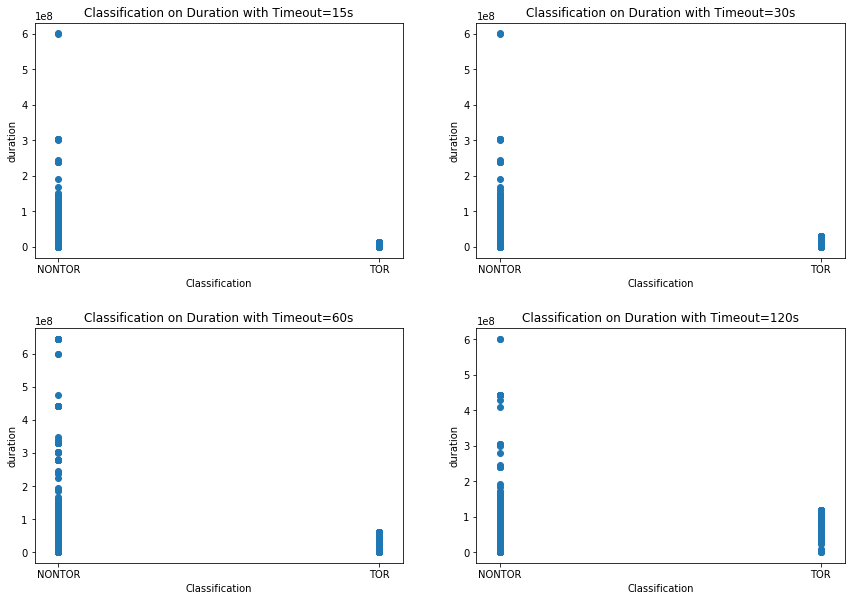

In [14]:
show_scatter_compare(dfs=[df15, df30, df60, df120], feature='duration', timeouts=['15', '30', '60','120'])

Now that we have a function that will show all of the graphs for a given feature side-by-side, we can easily generate all of the graphs we need by using only one `for` loop!

Feature: duration


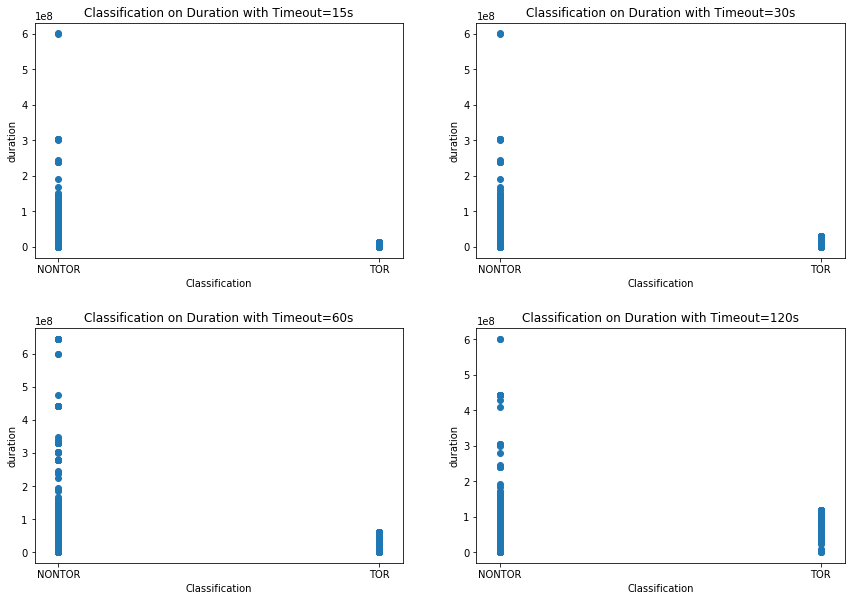

Feature: total_fiat
No feature for 60s


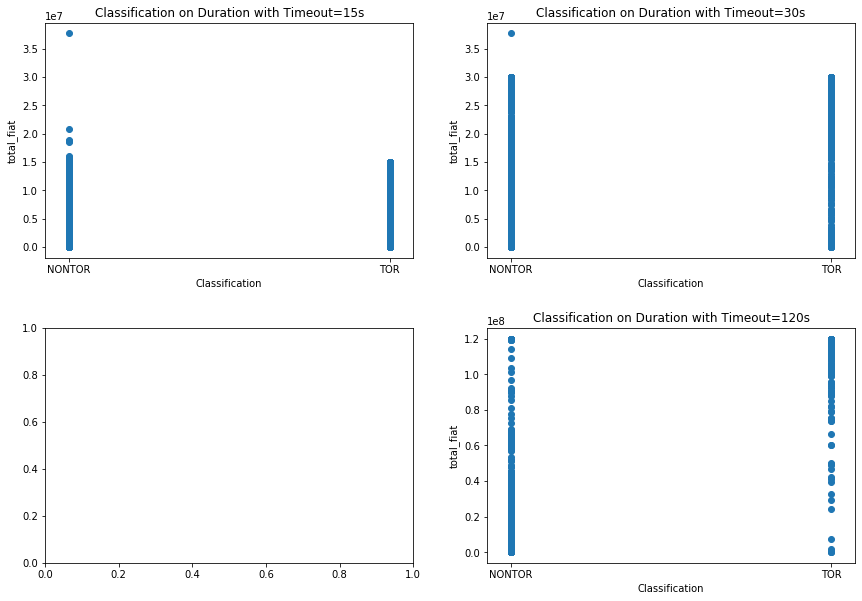

Feature: total_biat
No feature for 60s


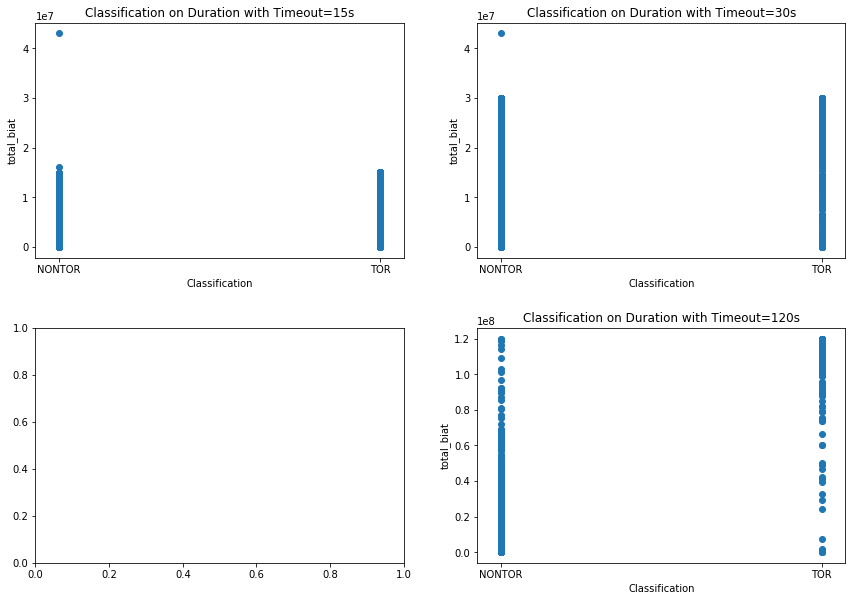

Feature: min_fiat


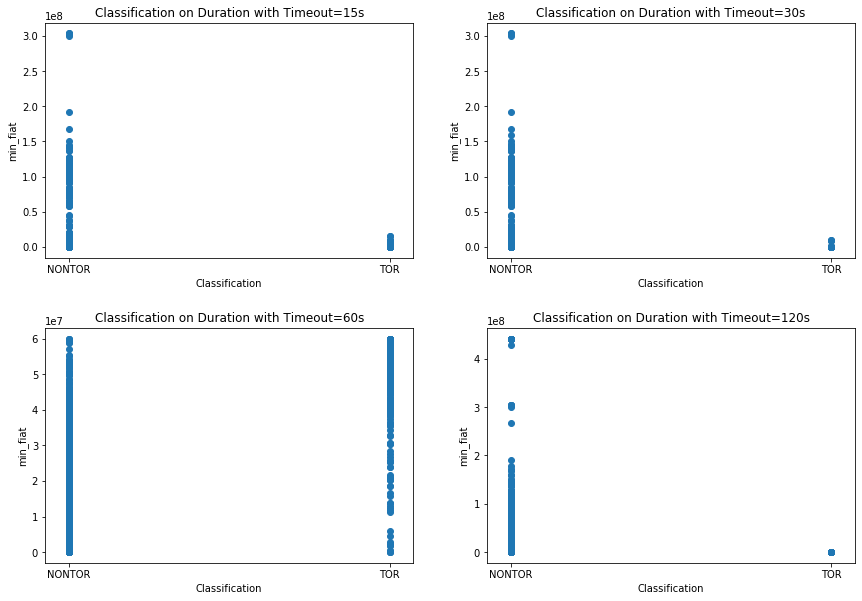

Feature: min_biat


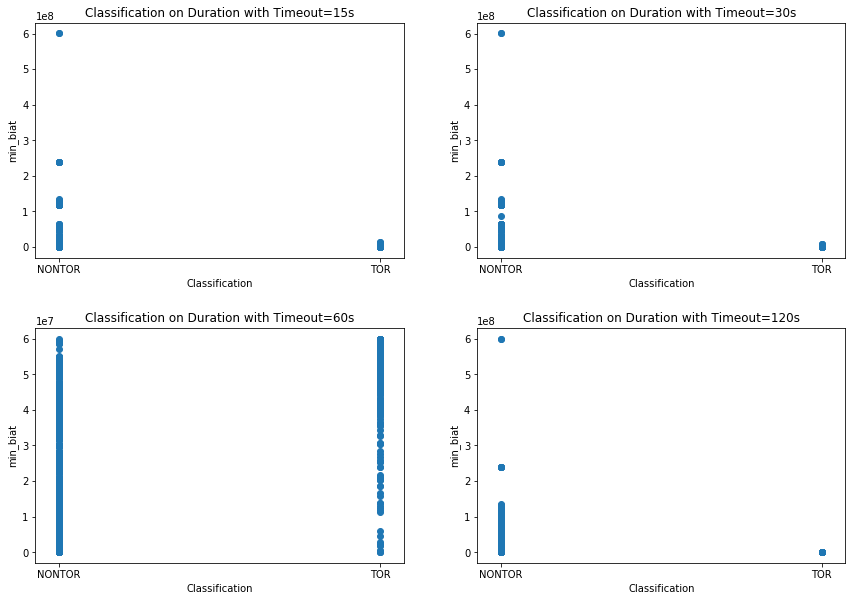

Feature: max_fiat


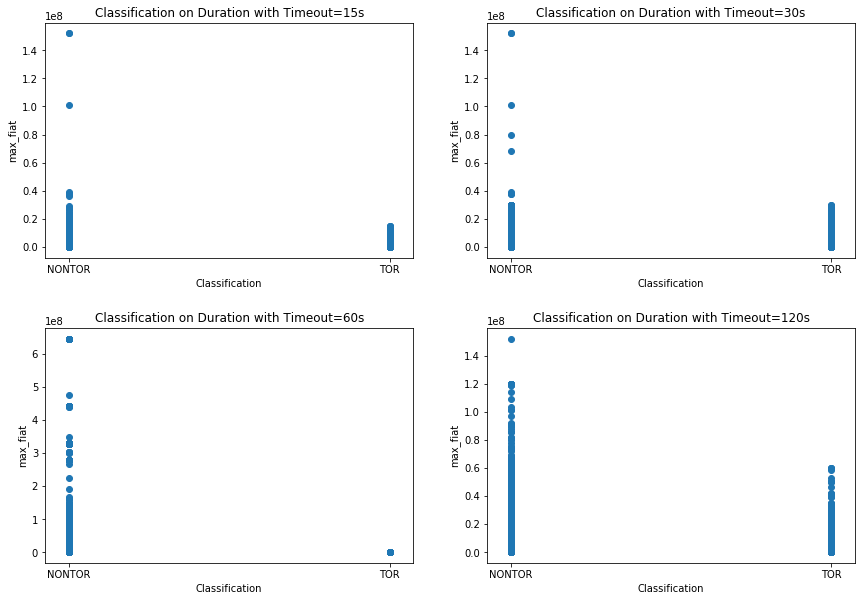

Feature: max_biat


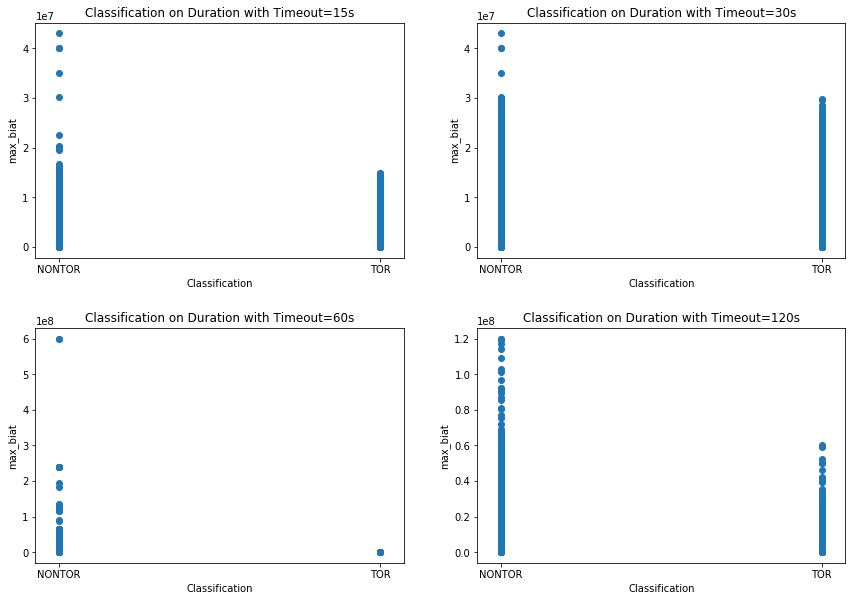

Feature: mean_fiat


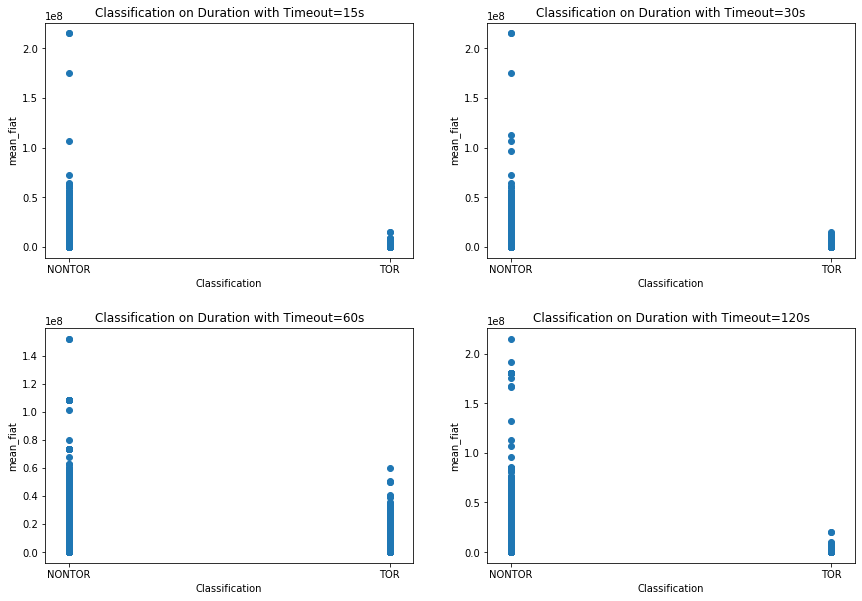

Feature: mean_biat


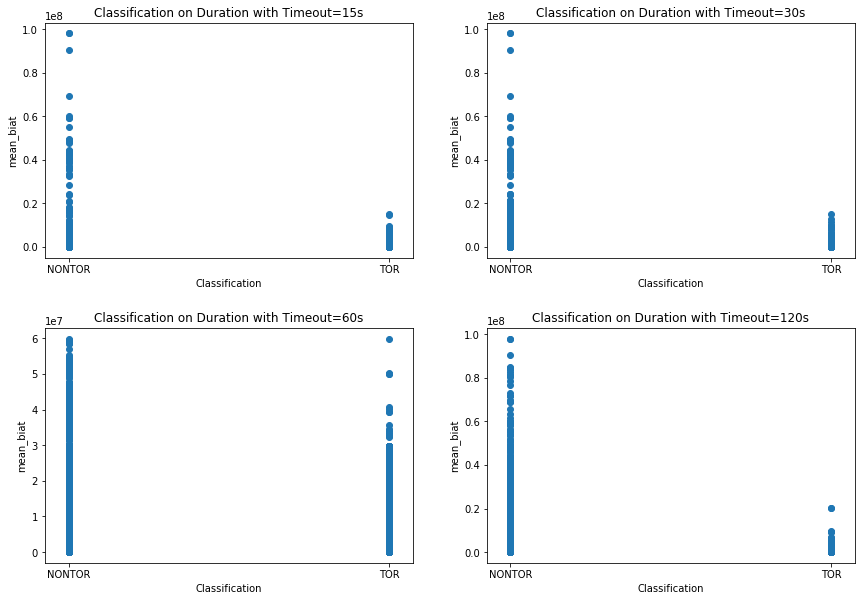

Feature: flowPktsPerSecond


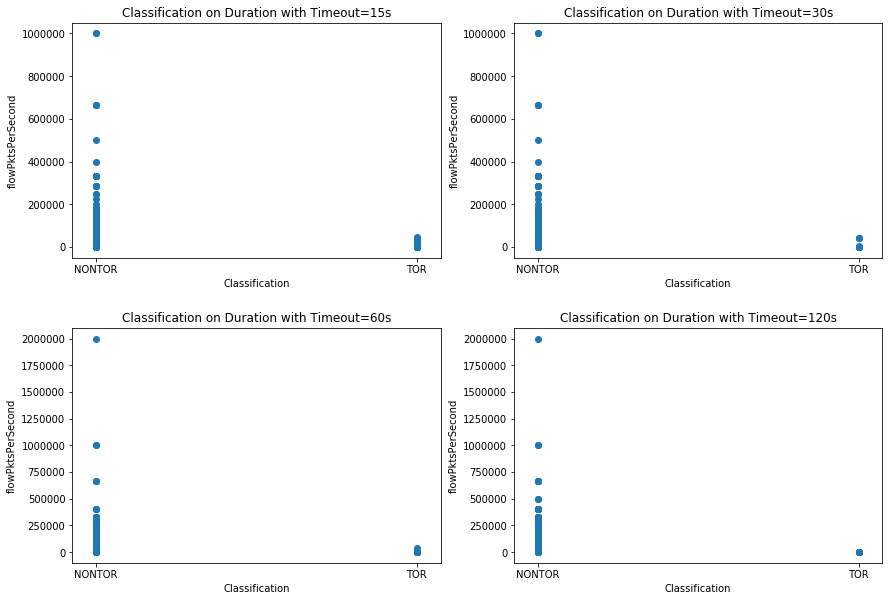

Feature: flowBytesPerSecond


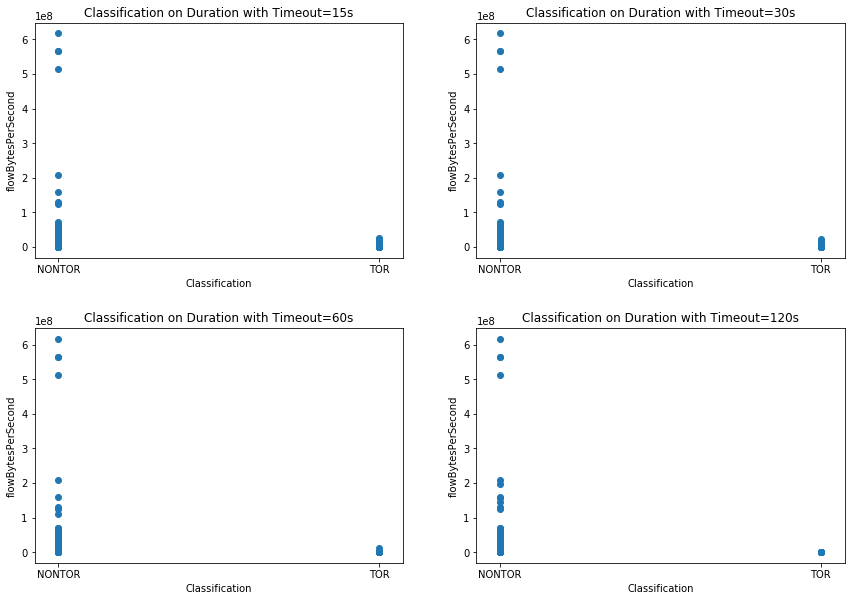

Feature: min_flowiat


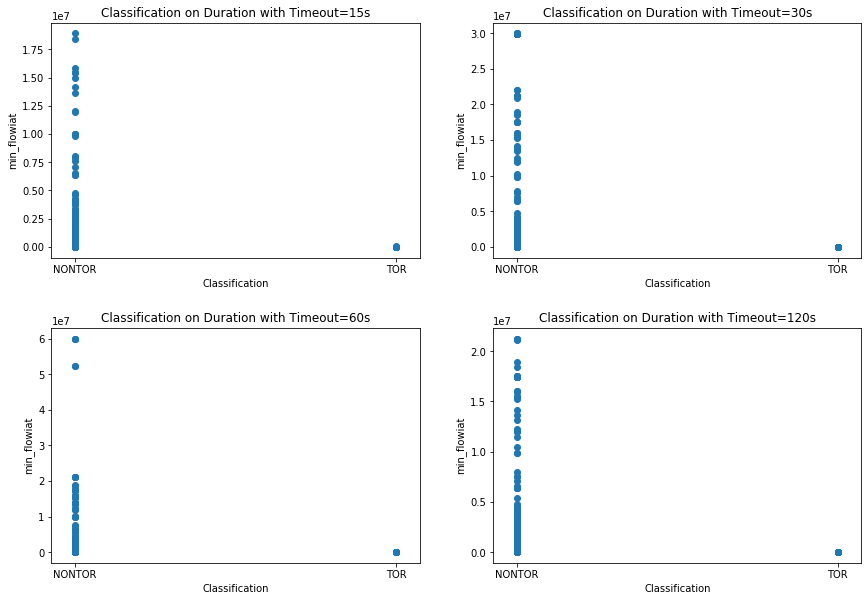

Feature: max_flowiat


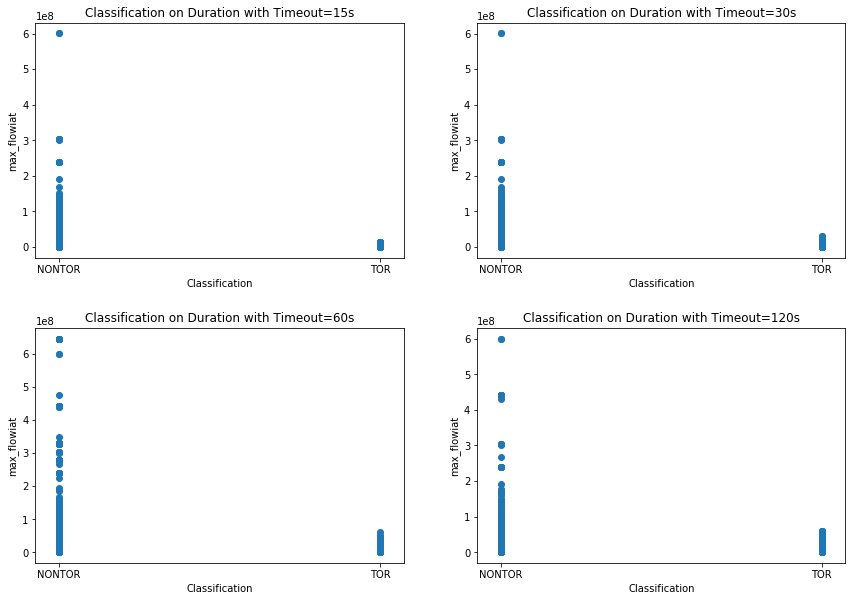

Feature: mean_flowiat


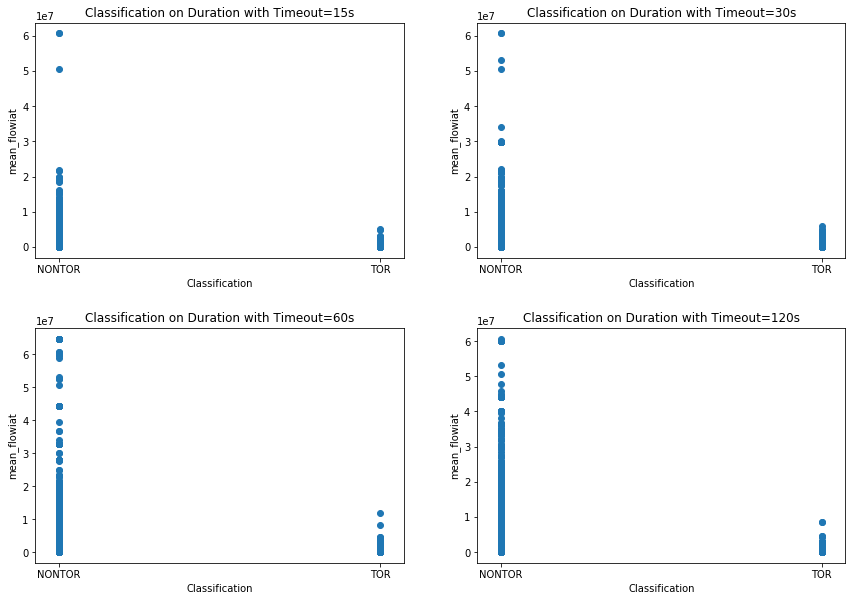

Feature: std_flowiat


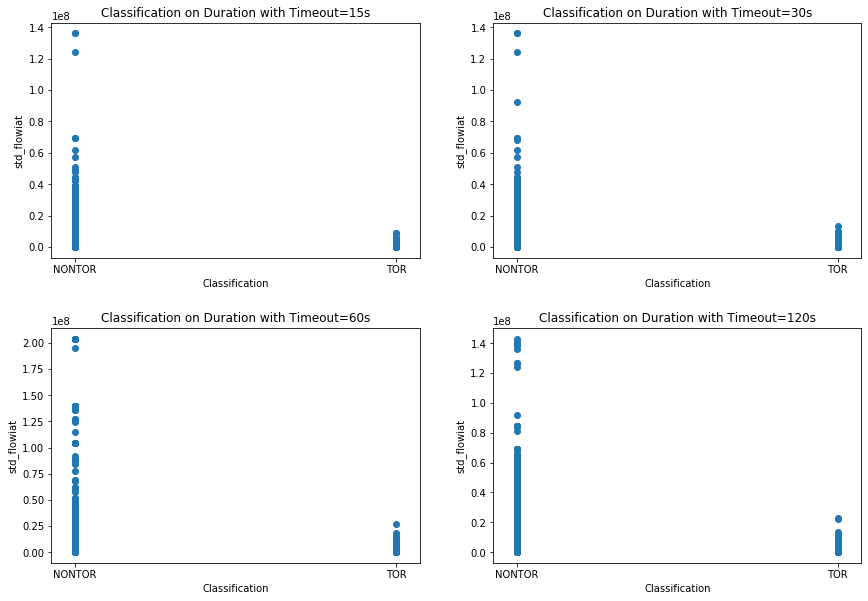

Feature: min_active


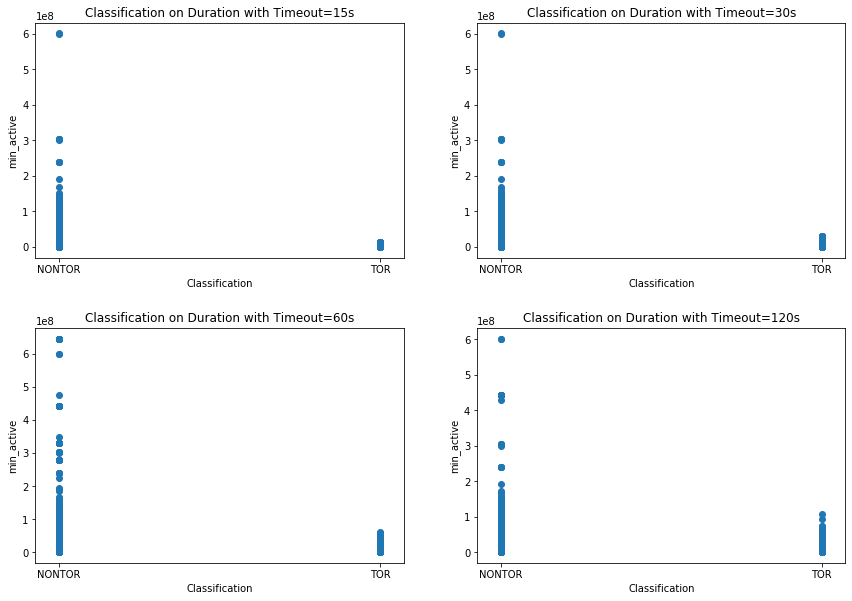

Feature: mean_active


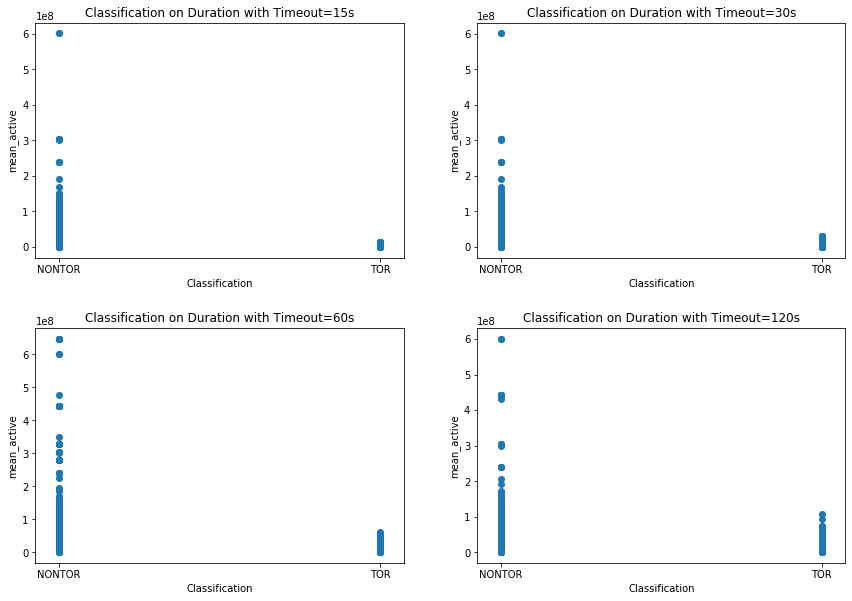

Feature: max_active


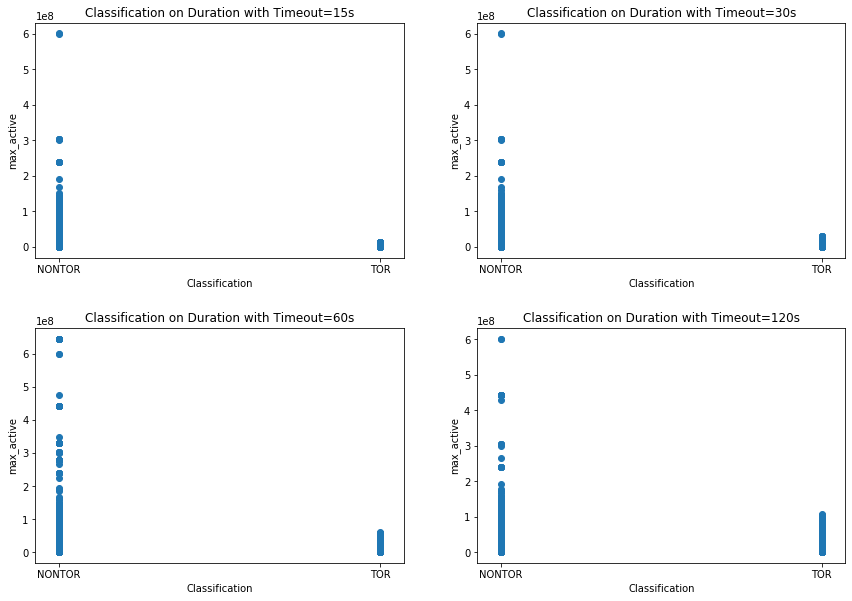

Feature: std_active


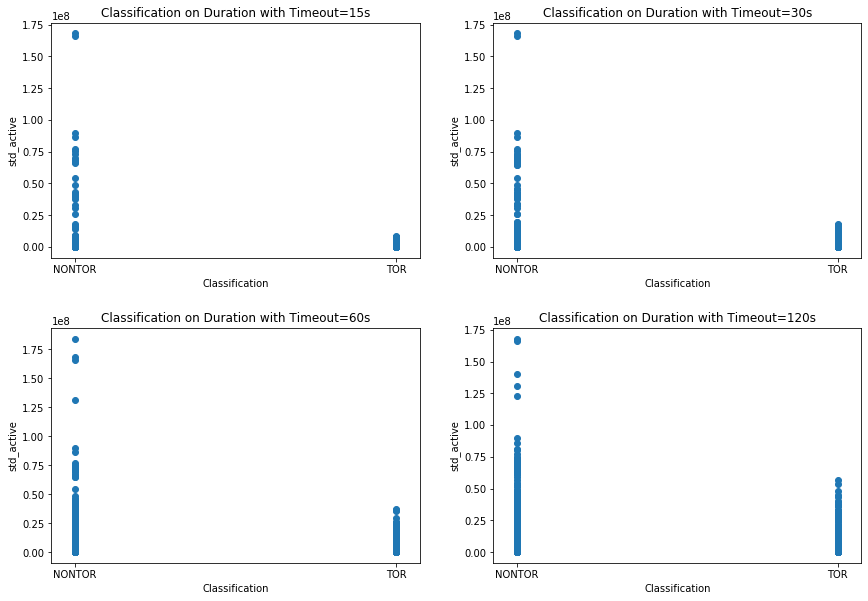

Feature: min_idle


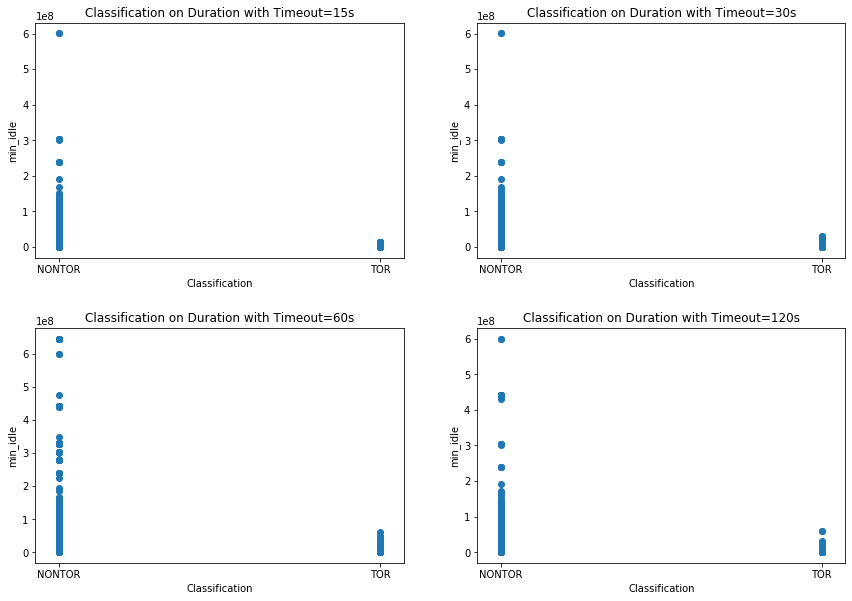

Feature: mean_idle


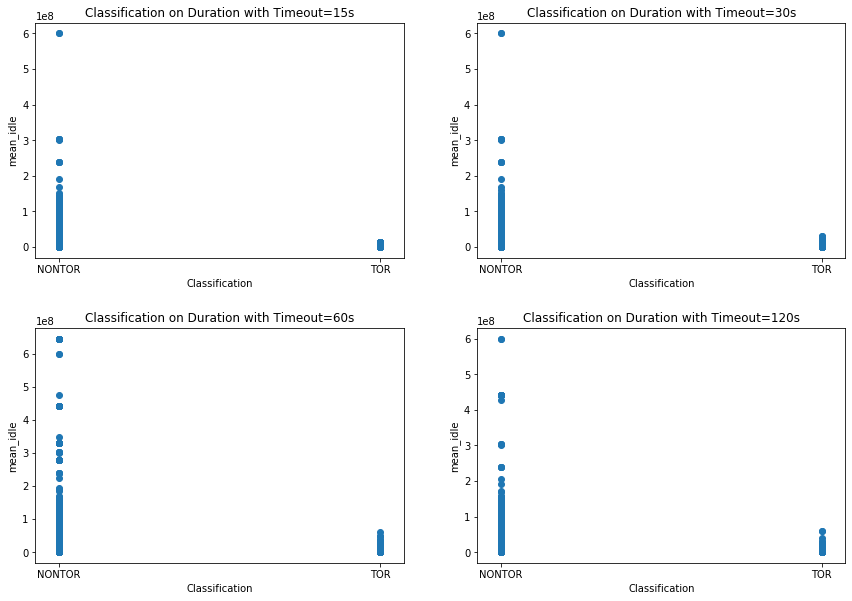

Feature: max_idle


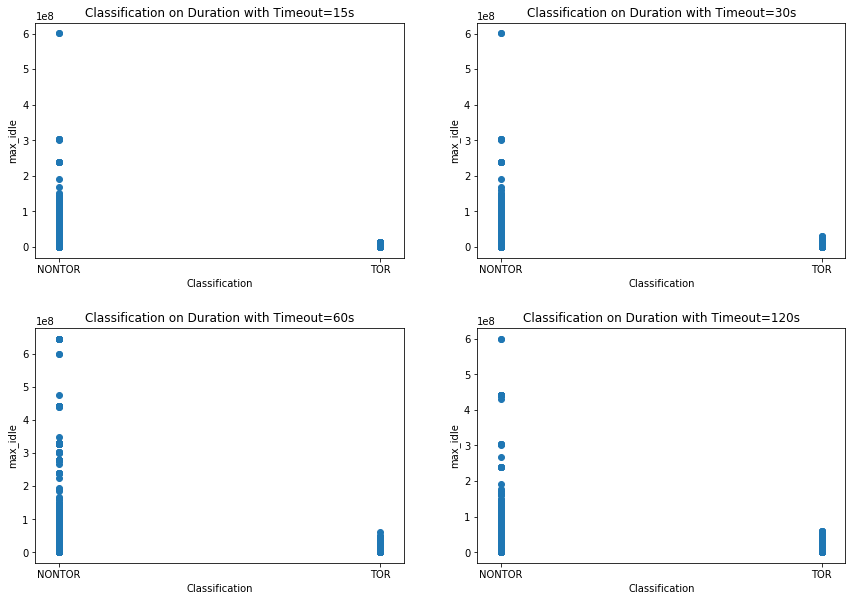

Feature: std_idle


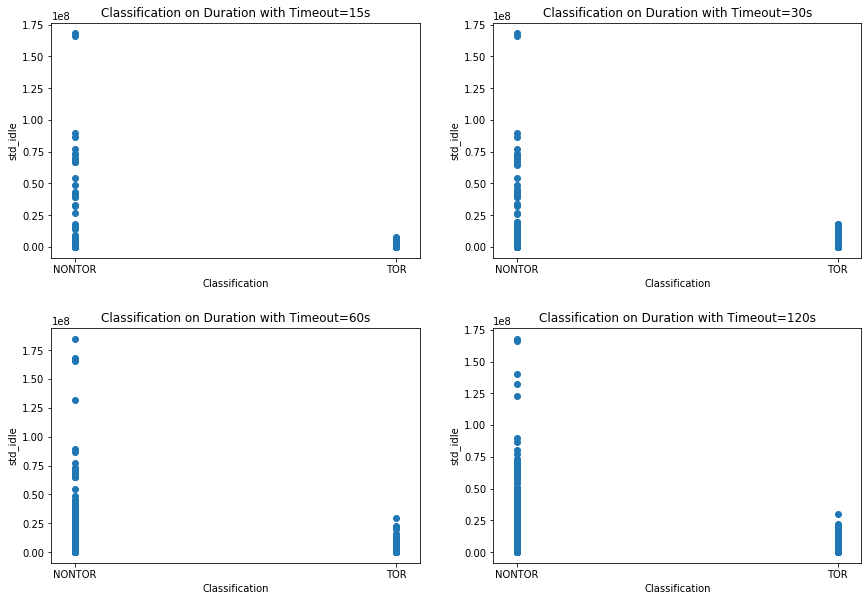

Feature: std_fiat
No feature for 15s
No feature for 30s
No feature for 120s


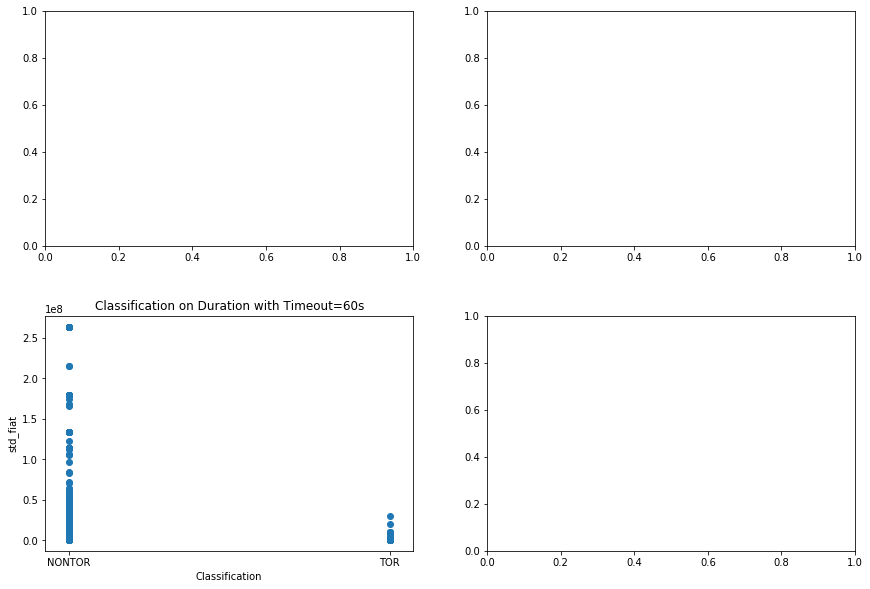

Feature: std_biat
No feature for 15s
No feature for 30s
No feature for 120s


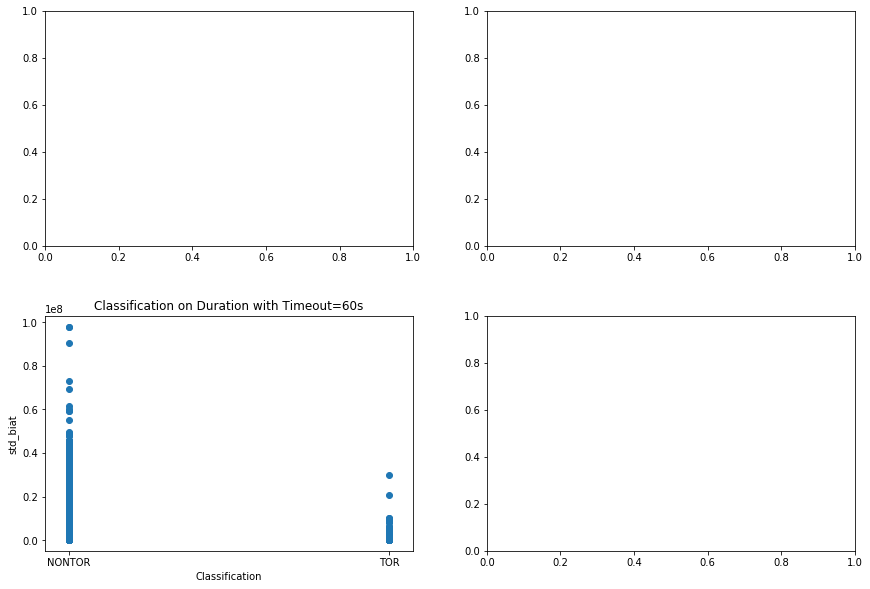

In [15]:
for feature in features:
    print('Feature: {}'.format(feature))
    show_scatter_compare(dfs=[df15, df30, df60, df120], feature=feature, timeouts=['15', '30', '60','120'])